# **EDA aplicado ao Retorno Histórico do Ibovespa: Estatística, Python, História e Mercado**

# 1) Storytelling

Em 1814 o matemático francês Pierre-Simon Laplace (1749-1827) publicou um artigo determinístico causal chamado "O Demônio de Laplace". Nele, Laplace estabelecia a linha do tempo de fatos universais presentes como derivadas de eventos passados e causais a eventos futuros.

Eis: "Se um intelecto em certo momento tiver conhecimento de todas as forças que colocam a natureza em movimento, e a posição de todos os itens dos quais a natureza é composta, e se esse intelecto for grandioso o bastante para submeter tais dados à análise, ele incluiria numa única fórmula os movimentos dos maiores corpos do universo e também os dos átomos mais diminutos; para tal intelecto nada seria incerto e o futuro, assim como o passado, estaria ao alcance de seus olhos."

Quase 150 anos depois, John Tukey (1915-2000) cunhou o termo "Análise de dados" e em 1962,  publicou "O futuro da análise de dados".
Em 1977 publicou "Análise Exploratória de Dados", trazendo conceitos como o boxplot, o jackknife (precursor do bootstrap) e o algoritmo da Transformada de Fast Fourier.
Já naquela época Tukey dizia que precisávamos encarar o fato de que a análise de dados é uma ciência intrinsecamente empírica e não um sistema lógico-dedutivo como a geometria plana euclidiana.

O avanço dos métodos computacionais e técnicas estatísticas atuais nos permitem trabalhar com uma gama de dados tal qual possamos analisar, inferir e buscar prever o comportamento do escopo desse trabalho.

Faremos uma Análise Exploratória de Dados do índice IBOVESPA. As conclusões estão em comentários breves e bem explicados nos próprios códigos ou em caixa de texto.

# 2) Importar bibliotecas

In [3]:
!pip install yfinance --upgrade --no-cache-dir -q           # Instalar lib do Yahoo Finance
import yfinance as yf                                       # Importação da lib do Yahoo Finance
yf.pdr_override()                                           # Retorna um dataframe pandas dos dados do yahoo finance
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader.data as web
import matplotlib.pyplot as plt

#3) Webscrapping

In [4]:
# Criar e visualizar a variável ibov

ibov = web.get_data_yahoo('^BVSP')

[*********************100%***********************]  1 of 1 completed


In [5]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-04-27,24.799999,25.400000,24.500000,24.500000,24.500000,0
1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0
1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0
1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0
1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0


In [6]:
ibov= ibov['Adj Close']
ibov

Date
1993-04-27        24.500000
1993-04-28        24.299999
1993-04-29        23.700001
1993-04-30        24.100000
1993-05-03        24.100000
                  ...      
2023-06-26    118243.000000
2023-06-27    117523.000000
2023-06-28    116681.000000
2023-06-29    118383.000000
2023-06-30    118087.000000
Name: Adj Close, Length: 7469, dtype: float64

In [7]:
# Não há valores faltantes
ibov.isna().sum()

0

In [8]:
# Normalizar o retorno diário (partindo de um mesmo índice)

retorno_diario_norm = pd.DataFrame(ibov.pct_change())
retorno_diario_norm.rename(columns = {'Adj Close': 'Retorno'}, inplace=True)      # Renomear a coluna
retorno_diario_norm.head()

,Retorno
Date,
1993-04-27,NaN
1993-04-28,-0.008163
1993-04-29,-0.024691
1993-04-30,0.016878
1993-05-03,0.000000


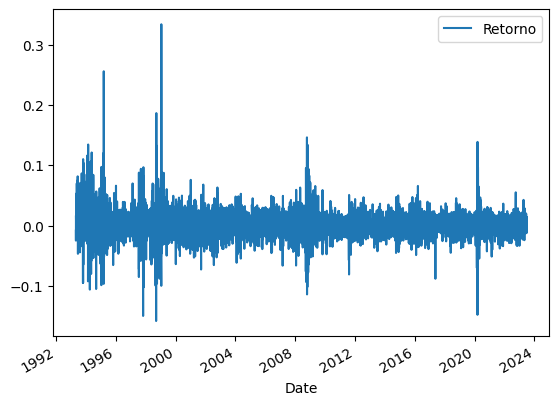

In [9]:
# Observe as maiores oscilações do retorno diário nos momentos históricos:

# 1) Início do Plano Real (1994); 2) Bolha da Internet (início em 1995 e pico em março/2000);
# 3) Crise do Subprime ( início em 2007 com pico em 2008 e término em 2010) e 4) Pandemia Covid (início global em fev/2020 )

retorno_diario_norm.plot();

In [10]:
# Converter as bases para retorno mensal

retorno_mensal = ibov.resample("M", kind='period').last().pct_change().dropna().to_frame()
retorno_mensal.rename(columns = {'Adj Close': 'Retorno'}, inplace=True)
retorno_mensal.head()

,Retorno
Date,
1993-05,0.448133
1993-06,0.538682
1993-07,0.221601
1993-08,0.469512
1993-09,0.520747


#4) Formatação da tabela de retorno mensal

In [11]:
# Criar e adicionar as colunas de mês e ano

retorno_mensal['Mês'] = retorno_mensal.index.month
retorno_mensal['Ano'] = retorno_mensal.index.year

retorno_mensal.tail()

,Retorno,Mês,Ano
Date,,,
2023-02,-0.075750,2,2023
2023-03,-0.029066,3,2023
2023-04,0.025029,4,2023
2023-05,0.037374,5,2023
2023-06,0.090017,6,2023


In [12]:
# Pivotar dados para indexar os meses anualmente

tab_retorno_mensal = retorno_mensal.pivot(values='Retorno', index='Ano', columns='Mês')
tab_retorno_mensal

Mês,1,2,3,4,5,6,7,8,9,10,11,12
Ano,,,,,,,,,,,,
1993,NaN,NaN,NaN,NaN,0.448133,0.538682,0.221601,0.469512,0.520747,0.257844,0.485900,0.370438
1994,0.972304,0.423035,0.438087,0.127210,0.444158,0.468547,0.159555,0.268536,0.028990,-0.125109,-0.029575,-0.064884
1995,-0.107697,-0.158070,-0.089241,0.280195,-0.024412,-0.031500,0.076067,0.111670,0.083424,-0.115993,0.060605,-0.018179
1996,0.198302,-0.037620,-0.000565,0.042221,0.109196,0.055150,0.013137,0.022227,0.029955,0.013386,0.020342,0.056075
1997,0.131366,0.108479,0.024386,0.103715,0.136546,0.107801,0.024188,-0.175808,0.111980,-0.238281,0.045515,0.085365
1998,-0.046778,0.087551,0.130167,-0.022600,-0.156718,-0.017163,0.106324,-0.395536,0.018696,0.068861,0.224777,-0.213996
1999,0.204599,0.090431,0.200314,0.061238,-0.022994,0.048422,-0.101918,0.011779,0.051207,0.053485,0.177692,0.240438
2000,-0.041189,0.077618,0.009060,-0.128058,-0.037392,0.118406,-0.016320,0.054208,-0.081801,-0.066612,-0.106276,0.148416
2001,0.158202,-0.100832,-0.091435,0.033246,-0.017965,-0.006143,-0.055357,-0.066381,-0.171716,0.068541,0.137879,0.049954


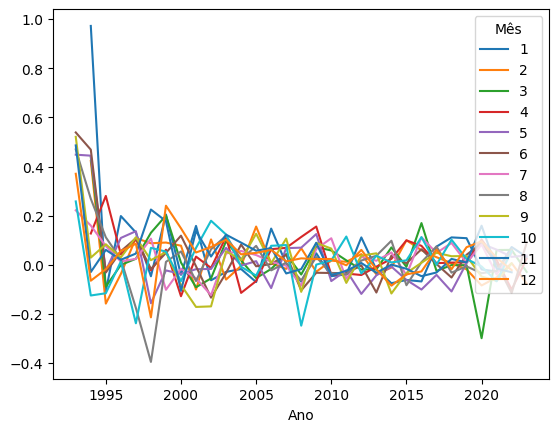

In [13]:
tab_retorno_mensal.plot();

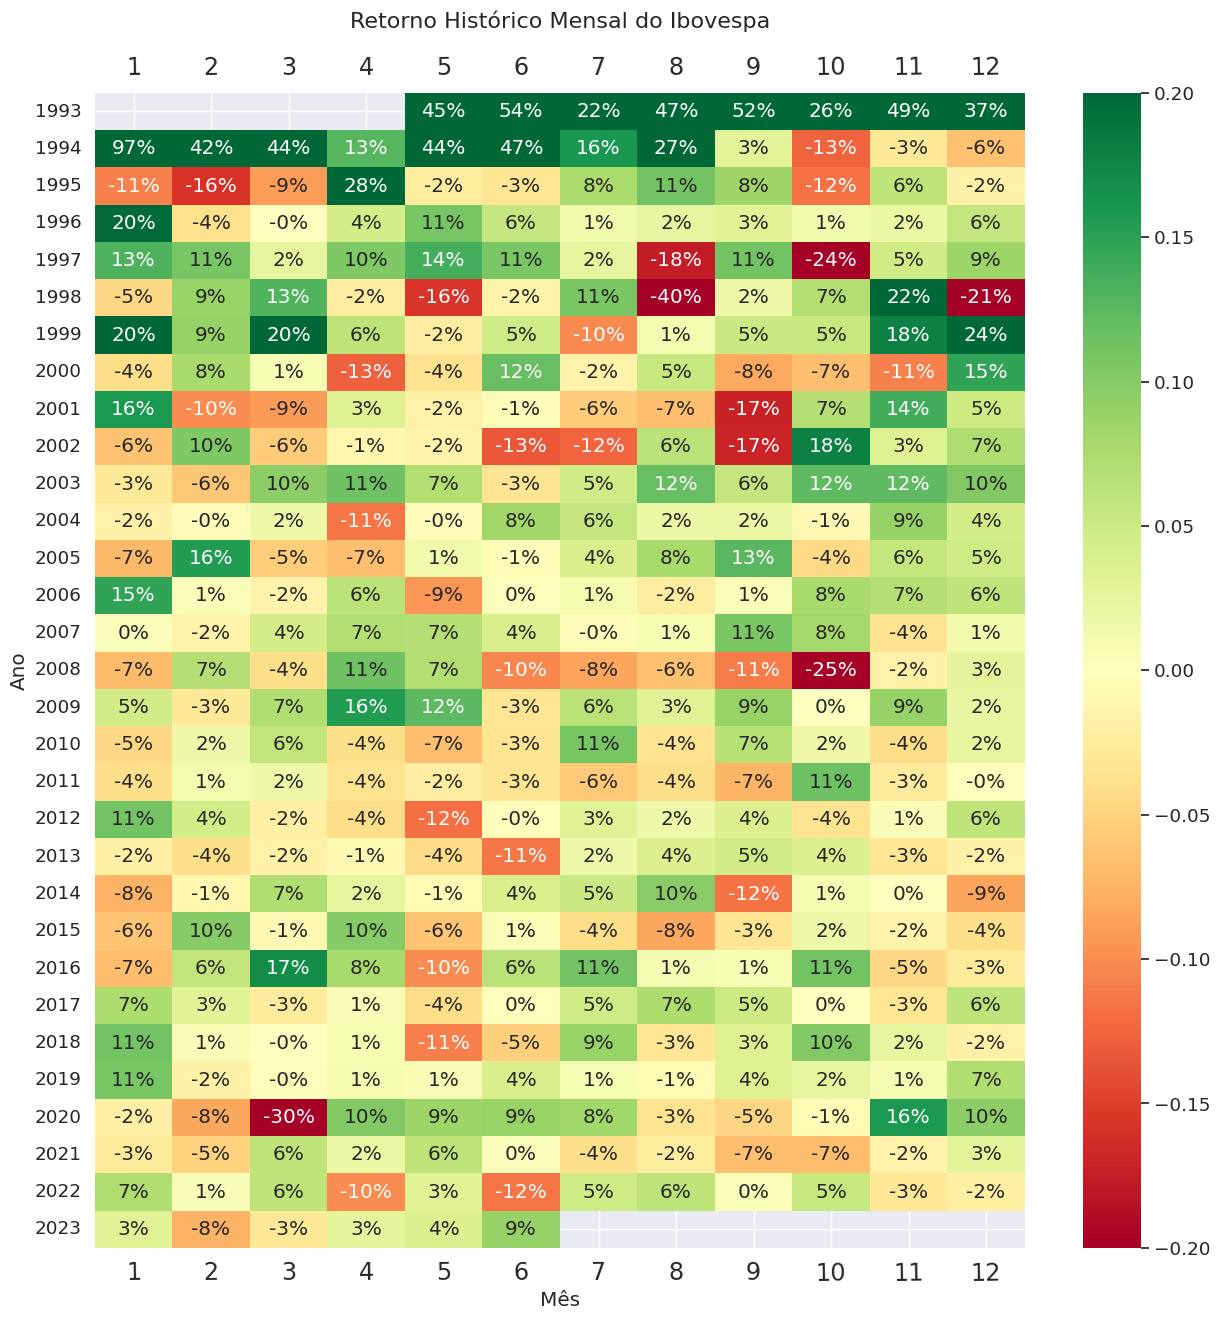

In [14]:
# Heatmap da tabela acima
# Caso queira retirar a barra de +0,2 a -0,2, acrescentar a última linha de codigo cbar = False


plt.figure(figsize=(15,15))                             # Tamanho da figura
sns.set(font_scale=1.2)                                 # Escala da fonte
ax = sns.heatmap(tab_retorno_mensal,
                 annot = True,                          # Acrescenta o valor em cada célula
                 fmt = '.0%',                           # Insere o número de casas decimais do valor
                 center =0,                             # Estabelece a posição do valor
                 vmin=-0.2,                             # Range mínimo de ancoramento dos valores
                 vmax=0.2,                              # Range máximo de ancoramento dos valores
                 cmap='RdYlGn')                         # Range de paleta de cores entre verde e vermelho
ax.set_title('Retorno Histórico Mensal do Ibovespa', fontdict={'fontsize':16, 'fontweight':6},pad=20);
ax.tick_params('x', labelsize='large', labelrotation=0.9, labeltop = True)

# 5) Análise Exploratória do Retorno Histórico Ibovespa

## 5.1) Medidas de Posição - Primeiro momento da Distribuição

In [15]:
tab_retorno_mensal.describe()

# A base de dados apresenta 30 anos.

Mês,1,2,3,4,5,6,7,8,9,10,11,12
count,30.000000,30.000000,30.000000,30.000000,31.000000,31.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.052325,0.023572,0.023922,0.032128,0.024584,0.034821,0.029602,0.019150,0.021919,0.015189,0.046139,0.039037
std,0.195498,0.103543,0.118885,0.086590,0.133997,0.141162,0.075962,0.138048,0.122672,0.107188,0.112550,0.100539
min,-0.107697,-0.158070,-0.299044,-0.128058,-0.156718,-0.133893,-0.123530,-0.395536,-0.171716,-0.247956,-0.106276,-0.213996
25%,-0.046697,-0.035327,-0.023821,-0.020156,-0.042079,-0.033014,-0.013201,-0.033843,-0.044374,-0.028793,-0.028451,-0.018151
50%,-0.018156,0.006699,0.004248,0.024525,-0.007496,0.003014,0.035804,0.014482,0.029472,0.017940,0.014895,0.035513
75%,0.110535,0.075019,0.060447,0.093731,0.068269,0.059088,0.073085,0.062959,0.054172,0.075118,0.083993,0.068964
max,0.972304,0.423035,0.438087,0.280195,0.448133,0.538682,0.221601,0.469512,0.520747,0.257844,0.485900,0.370438


In [16]:
# Maior Média de Retorno Mensal Histórico
# A maior média de retorno mensal histórico foi em janeiro (5,23%), influenciada pelo maior retorno mensal histórico em
# janeiro de 1994, de 97%
# Observe ainda que, historicamente, as médias tendem a ser mais altas no trimestre nov/dez/jan. Uma explicação pode ser
# a estratégia de alocação dos ativos nesse período.
print('Maior Média de Retorno Mensal Histórico: ', round(tab_retorno_mensal.mean().max() * 100, 2), '%')

# Menor Média de Retorno Mensal Histórico
# Observe que a média de todos os retornos históricos são positivos. Consulte a tabela do heatmap para verificar os meses
# com retorno histórico negativo.
# A menor média de retorno mensal histórico foi em outubro (1,52%), influenciada pelos retornos negativos em 1997 (-24%)
# e 2008 (-25%)

print('Menor Média de Retorno Mensal Histórico: ', round(tab_retorno_mensal.mean().min() * 100, 2), '%')

# Máximo Retorno Mensal Histórico Médio meses antes do início do Plano Real
# O maior retorno mensal histórico foi em janeiro de 1994, com 97% de retorno. O Plano Real teve seu início em 1/7/1994
# e a inflação desse ano fechou a 916%! Em 1995 a inflação fechou a 22%. Logo, o mercado de capitais precificou
# (e se beneficiou) do Plano Real antes da sua implementação.

print('Máximo Retorno Mensal Histórico Médio:  ', round(tab_retorno_mensal.max().max()*100,2), '%')

# Mínimo Retorno Mensal Histórico Médio
# O menor retorno mensal histórico foi em agosto de 1998, com -39,55% de retorno. Uma possível explicação é a crise cambial
# de 1998/1999 explicado pelo Modelo Canônico de Krugman. Para mais informações, consultar a dissertação de
# Mônica Remde intitulada "A crise brasileira de 1998-1999: análise sob a ótica do modelo de Krugman." disponível em:
# https://wp.ufpel.edu.br/ppgom/files/2017/06/monicaremde.pdf

print('Mínimo Retorno Mensal Histórico Médio: ', round(tab_retorno_mensal.min().min()*100,2), '%')

# Máximo Desvio Padrão Mensal Histórico Médio
# O Máximo Desvio Padrão Mensal Histórico Médio é em jan, devido ao carregamento das médias altas no trimestre nov/dez/jan

print('Máximo Desvio Padrão Mensal Histórico Médio: ', round(tab_retorno_mensal.std().max()*100,2), '%')

# Mínimo Desvio Padrão Mensal Histórico Médio
print('Mínimo Desvio Padrão Mensal Histórico Médio: ', round(tab_retorno_mensal.std().min()*100,2), '%')

Maior Média de Retorno Mensal Histórico:  5.23 %
Menor Média de Retorno Mensal Histórico:  1.52 %
Máximo Retorno Mensal Histórico Médio:   97.23 %
Mínimo Retorno Mensal Histórico Médio:  -39.55 %
Máximo Desvio Padrão Mensal Histórico Médio:  19.55 %
Mínimo Desvio Padrão Mensal Histórico Médio:  7.6 %


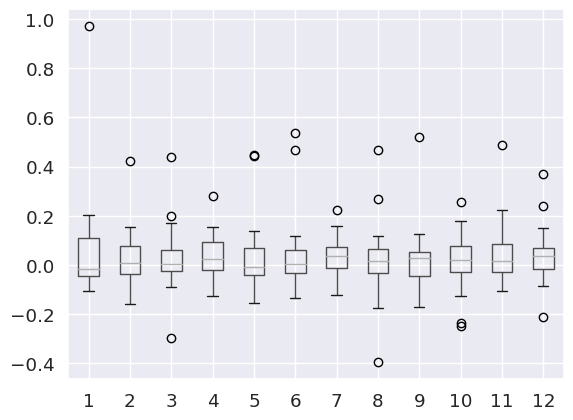

In [17]:
# Detecção de Outliers Mensais

# Esse boxplot em conjunto ao heatmap mostram os outliers mensais (plot boxplot) e o ano correspondente (plot heatmap).

# O período Pré Plano Real, de Maio de 1993 até Março de 1994 foi todo de Outliers. Uma explicação é a Confiança do Investidor no plano econômico que mais tarde
# se confirmou como sucesso na contenção da inflação e estabilização do tripé econômico.
# Há 1 outlier em janeiro histórico: acima da média em 97% no início do Plano Real em 1994. Tal fato corrobora o
# pensamento de que "Quem chega primeiro bebe a água mais limpa".
# Há 3 outliers em dezembro histórico: um abaixo da média em 1998 (-21%) e dois acima da média em 1993 (37%) e
# em 1999 (24%).
# É nítida a redução histórica na quantidade de Outliers, sendo o último Outlier negativo em março de 2020, início do
# estado de alerta global da pandemia Covid-19.
# Outroponto é a estatística descritiva apontar a Maior Média de Retorno Mensal Histórica em jan a 5.23 %, porém o
# boxplot apontar visualmente medianas históricas mais altas em jul e dez. Curiosamente, jan e mai são os único meses
# que apresentam mediana negativa histórica.

tab_retorno_mensal.boxplot();

In [18]:
# Moda

tab_retorno_mensal.mode()

Mês,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.107697,-0.158070,-0.299044,-0.128058,-0.156718,-0.133893,-0.123530,-0.395536,-0.171716,-0.247956,-0.106276,-0.213996
1,-0.075097,-0.100832,-0.091435,-0.114488,-0.118570,-0.115033,-0.101918,-0.175808,-0.169428,-0.238281,-0.046500,-0.085193
2,-0.070431,-0.084291,-0.089241,-0.101026,-0.108703,-0.113053,-0.084792,-0.083338,-0.117021,-0.125109,-0.041996,-0.064884
3,-0.068810,-0.075750,-0.055441,-0.066401,-0.100889,-0.104349,-0.057384,-0.066381,-0.110255,-0.115993,-0.035396,-0.039229
4,-0.067912,-0.060324,-0.054302,-0.041714,-0.094963,-0.051997,-0.055357,-0.064280,-0.081801,-0.067382,-0.032697,-0.027122
5,-0.063117,-0.051480,-0.039708,-0.040385,-0.066385,-0.034293,-0.041748,-0.039576,-0.073830,-0.066612,-0.031450,-0.021825
6,-0.061971,-0.039106,-0.029066,-0.035779,-0.061694,-0.033483,-0.039439,-0.035103,-0.065684,-0.044010,-0.030602,-0.018578
7,-0.046778,-0.037620,-0.025172,-0.022600,-0.042998,-0.033453,-0.016320,-0.034427,-0.047963,-0.035623,-0.029575,-0.018179
8,-0.046451,-0.028447,-0.019768,-0.012825,-0.041160,-0.032576,-0.003842,-0.032088,-0.033608,-0.008303,-0.025078,-0.018066
9,-0.041189,-0.018584,-0.018668,-0.007844,-0.037392,-0.031500,0.008369,-0.024795,0.004693,-0.006881,-0.017742,-0.002127


In [19]:
# Em média 12.25 dias de todos os meses apresentam retorno negativo. E esse fenômeno se concentra sempre nos 1º dias.
# A moda do retorno histórico aponta a quantidade de dias com retorno negativo no mês. São sempre os primeiros e
# consecutivos dias.
# Essa análise aponta a possibilidade de uma estratégia de Trading de curto prazo em momentos específicos ou
# por uma estratégia Long Only/buy and hold rumo ao alcance de retornos positivos.

print((tab_retorno_mensal < 0).sum().to_frame())
print((tab_retorno_mensal < 0).sum().to_frame().mean())

      0
Mês    
1    16
2    13
3    15
4    10
5    17
6    14
7     9
8    12
9     9
10   10
11   12
12   10
0    12.25
dtype: float64


### 5.1.1) Medidas de Posição - Análises por dias semanais

In [20]:
# 1) Criar uma croostab entre dias da semana e retornos positivos e negativos

# 1.1) Criar coluna 'Dias da Semana'
retorno_diario_norm['Dia da Semana'] = retorno_diario_norm.index.strftime('%A')
retorno_diario_norm.head(5)

,Retorno,Dia da Semana
Date,,
1993-04-27,NaN,Tuesday
1993-04-28,-0.008163,Wednesday
1993-04-29,-0.024691,Thursday
1993-04-30,0.016878,Friday
1993-05-03,0.000000,Monday


In [21]:
# 1.2) Criar coluna 'Sinal do Retorno'
retorno_diario_norm['Sinal do Retorno'] = np.where(retorno_diario_norm['Retorno'] > 0, 'Positivo',
np.where(retorno_diario_norm['Retorno'] == 0, 'Nulo', 'Negativo'))

retorno_diario_norm.head(5)

,Retorno,Dia da Semana,Sinal do Retorno
Date,,,
1993-04-27,NaN,Tuesday,Negativo
1993-04-28,-0.008163,Wednesday,Negativo
1993-04-29,-0.024691,Thursday,Negativo
1993-04-30,0.016878,Friday,Positivo
1993-05-03,0.000000,Monday,Nulo


In [22]:
# 1.3) Criação da Crosstab
crosstab_dias_semana = pd.crosstab(retorno_diario_norm['Dia da Semana'], retorno_diario_norm['Sinal do Retorno'])
crosstab_dias_semana

Sinal do Retorno,Negativo,Nulo,Positivo
Dia da Semana,,,
Friday,674,5,804
Monday,731,4,755
Thursday,703,2,781
Tuesday,689,4,798
Wednesday,706,4,809


In [23]:
# 1.4) Adicionar planilhas importantes á Crossstab

crosstab_dias_semana['Total na Semana'] = crosstab_dias_semana.sum(axis = 1)
crosstab_dias_semana.loc['Total Sinal do Retorno'] = crosstab_dias_semana.sum(axis = 0)
crosstab_dias_semana['% Sinal Neg.'] = crosstab_dias_semana['Negativo'] / crosstab_dias_semana['Total na Semana'] * 100
crosstab_dias_semana['% Sinal Pos.'] = crosstab_dias_semana['Positivo'] / crosstab_dias_semana['Total na Semana'] * 100
crosstab_dias_semana

Sinal do Retorno,Negativo,Nulo,Positivo,Total na Semana,% Sinal Neg.,% Sinal Pos.
Dia da Semana,,,,,,
Friday,674,5,804,1483,45.448415,54.214430
Monday,731,4,755,1490,49.060403,50.671141
Thursday,703,2,781,1486,47.308210,52.557201
Tuesday,689,4,798,1491,46.210597,53.521127
Wednesday,706,4,809,1519,46.477946,53.258723
Total Sinal do Retorno,3503,19,3947,7469,46.900522,52.845093


Conclusões da Crosstab sinais de retorno semanal (crosstab_dias_semana):

1) As sextas-feiras concentram a maior disparidade de retorno positivo, sendo 54% contra 46% negativos. Em seguida as terças-feiras com 53% contra 47% negativos e por último as quartas-feiras com 53% contra 47 negativos.

2) As segundas-feiras são o dia da semana com os retornos mais equilibrados.

In [24]:
# 2) Criar uma pivot tab do retorno histórico semanal

#2.1) Manipular o arquivo retorno_diario_norm para receber o retorno diário e dia da semana

retorno_diario_trab = retorno_diario_norm
del retorno_diario_trab['Sinal do Retorno']
retorno_diario_trab.head()

,Retorno,Dia da Semana
Date,,
1993-04-27,NaN,Tuesday
1993-04-28,-0.008163,Wednesday
1993-04-29,-0.024691,Thursday
1993-04-30,0.016878,Friday
1993-05-03,0.000000,Monday


In [25]:
# 2.2) Criar a pivot table

retorno_semanal_pivot = pd.pivot_table(retorno_diario_trab, index='Dia da Semana', values='Retorno', aggfunc = ['mean','median', 'max', 'min'] )*100
retorno_semanal_pivot

,mean,median,max,min
,Retorno,Retorno,Retorno,Retorno
Dia da Semana,,,,
Friday,0.228270,0.181200,33.419023,-9.222788
Monday,-0.014067,0.024286,14.655996,-14.967518
Thursday,0.051713,0.110822,12.150314,-15.809019
Tuesday,0.230831,0.141717,18.683396,-9.862728
Wednesday,0.190057,0.123276,10.975610,-11.393105


Impressoes sobre a crosstab_dias_semana e retorno_semanal_pivot:

1) Os maiores retornos médios históricos são na terça, sexta-feira e quarta-feira, com 0,231%, 0,228% e 0,19% respectivamente

2) Conforme observado na crosstab_dias_semana, a segunda-feira concentra a maior parte dos retornos médios históricos negativos

3) Os valores de máximo e mínimo retornos médios históricos são na sexta e na quinta-feira, com 33,42% e -15,81%

4) Conforme observado na crosstab_dias_semana, a sexta-feira concentra a maior parte dos retornos positivos

In [26]:
# Agrupamento médio do retorno histórico mensal por ano
retorno_mensal[['Retorno', 'Mês', 'Ano']].groupby(['Ano','Mês']).mean().tail(30)

Retorno
Ano  Mês          
2021 1   -0.027652
     2   -0.051480
     3    0.059972
     4    0.019377
     5    0.061584
     6    0.004643
     7   -0.039439
     8   -0.024795
     9   -0.065684
     10  -0.067382
     11  -0.015324
     12   0.028524
2022 1    0.072180
     2    0.006709
     3    0.060605
     4   -0.101026
     5    0.032213
     6   -0.115033
     7    0.046914
     8    0.061629
     9    0.004693
     10   0.054527
     11  -0.030602
     12  -0.021825
2023 1    0.031818
     2   -0.075750
     3   -0.029066
     4    0.025029
     5    0.037374
     6    0.090017

## 5.2) Medidas de Dispersão - Segundo momento da Distribuição

In [27]:
tab_retorno_mensal.describe()

Mês,1,2,3,4,5,6,7,8,9,10,11,12
count,30.000000,30.000000,30.000000,30.000000,31.000000,31.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.052325,0.023572,0.023922,0.032128,0.024584,0.034821,0.029602,0.019150,0.021919,0.015189,0.046139,0.039037
std,0.195498,0.103543,0.118885,0.086590,0.133997,0.141162,0.075962,0.138048,0.122672,0.107188,0.112550,0.100539
min,-0.107697,-0.158070,-0.299044,-0.128058,-0.156718,-0.133893,-0.123530,-0.395536,-0.171716,-0.247956,-0.106276,-0.213996
25%,-0.046697,-0.035327,-0.023821,-0.020156,-0.042079,-0.033014,-0.013201,-0.033843,-0.044374,-0.028793,-0.028451,-0.018151
50%,-0.018156,0.006699,0.004248,0.024525,-0.007496,0.003014,0.035804,0.014482,0.029472,0.017940,0.014895,0.035513
75%,0.110535,0.075019,0.060447,0.093731,0.068269,0.059088,0.073085,0.062959,0.054172,0.075118,0.083993,0.068964
max,0.972304,0.423035,0.438087,0.280195,0.448133,0.538682,0.221601,0.469512,0.520747,0.257844,0.485900,0.370438


In [28]:
# Amplitude

# Média do retorno mínimo mensal histórico
print('Média do retorno mínimo mensal histórico: ', round(tab_retorno_mensal.min().sum(axis=0) / 12, 2), '%')

# Média do retorno máximo mensal histórico
print('Média do retorno máximo mensal histórico: ', round(tab_retorno_mensal.max().sum(axis=0) / 12, 2), '%')

Média do retorno mínimo mensal histórico:  -0.19 %
Média do retorno máximo mensal histórico:  0.45 %


In [29]:
# Desvio Padrão

# Máximo Retorno de Desvio padrão Mensal Histórico

# Mensalmente o maior desvio padrão histórico ocorre no mês de janeiro (19,55%), provavelmente pela estratégia de realocação
# de portfolios no fim do ano anterior (trimestre nov/dez/jan).
print(' Máximo Retorno de Desvio padrão Mensal Histórico:', round(tab_retorno_mensal.std().max(),4)*100, '%')

# Mínimo Retorno de Desvio padrão Mensal Histórico
# Mensalmente o menor desvio padrão histórico ocorre no mês de abril (7,60%)
print(' Mínimo Retorno de Desvio padrão Mensal Histórico:', round(tab_retorno_mensal.std().min(),4)*100, '%')

 Máximo Retorno de Desvio padrão Mensal Histórico: 19.55 %
 Mínimo Retorno de Desvio padrão Mensal Histórico: 7.6 %


In [30]:
# Estudo dos Quantis

# Observe que o primeiro Quantil (25%) de todos os meses históricos possui retorno negativo. Supondo um mês com 22 dias
# úteis, podemos inferir que a primeira semana (5,5 dias) de cada mês possuirá retorno negativo.

## 5.3) Medidas de Forma - Terceiro momento da Distribuição

In [31]:
# Assimetria
# Assimetria é uma medida estatística de forma, do grau de simetria em torno da média da distribuição dos dados.

# Analisando as 3 formas da Assimetria numa Distribuição Normal, ela pode ser:
#     1) Perfeitamente normal em:  μ = x͂ = Mo
#     2) Assimétrica Negativa em:  μ < x͂ < Mo
#     3) Assimétrica Positiva em: Mo < x͂ < μ
#     4) Além disso, a Assimetria da Distribuição Normal é igual e zero e a Kurtose é igual a 3.

# E observando o conceito de média (soma de observações do conjunto de dados / quantidade dessas observações), de moda (observação mais frequente no conjunto
# de dados) e x͂ (a observação de posição central no conjunto de dados), conclui-se que a assimetria negativa (Mo = retornos mais frequentes na esfera
# positiva do histograma) é a melhor distribuição de retornos para ativos individuais e carteiras.

# Em "Return Distribuitions in Finance - John Knight" pag 23, o autor cita pesquisas de Fama (1965) e Kon (1984) sobre retornos de
# ativos individuais e do mercado de ações fora dos EUA possuírem assimetria positiva.
# Talvez esssa seja uma evidência empírica para a necessidade da "dolarização" da carteira, pois observe: historicamente somente o mês de outubro possui
# assimetria negativa de retornos no ibov. Por outro lado, o Ibov é uma carteira teórica de ações e serve somente como parâmetro.


# Interpretação numérica
skew_mensal = pd.DataFrame(tab_retorno_mensal.skew())
skew_mensal.set_axis(['Assimetria'], axis=1, inplace=True)
skew_mensal

<ipython-input-31-1fe300ec3291>:22: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  skew_mensal.set_axis(['Assimetria'], axis=1, inplace=True)


,Assimetria
Mês,
1,3.797903
2,1.878697
3,0.947148
4,0.469851
5,2.009586
6,2.459698
7,0.154056
8,0.391031
9,2.098892


In [32]:
# Kurtose

# A Kurtose é uma medida estatística de forma do grau de "achatamento" (ou seja, ao quão acentuada é a cauda da função
# densidade da distribuição) em torno da moda da distribuição dos dados. (Adaptado de "Probability and Statistics for
# Finance, J. Fabozzi, pag 439")

# Observa-se uma Curtose Leptocúrtica (ou seja, altamente positiva em relação a 0,263) para todos os meses
# históricos, com destaque ao mês de janeiro

kurt_mensal = pd.DataFrame(tab_retorno_mensal.kurtosis())
kurt_mensal.set_axis(['Curtose'], axis=1, inplace=True)
kurt_mensal

<ipython-input-32-e0064df623a4>:11: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  kurt_mensal.set_axis(['Curtose'], axis=1, inplace=True)


,Curtose
Mês,
1,17.571972
2,6.859403
3,5.656577
4,1.107796
5,5.009185
6,7.165467
7,0.452392
8,5.599506
9,9.008603


In [33]:
skew_kurt_mensal = pd.concat([skew_mensal, kurt_mensal], axis=1)
skew_kurt_mensal

,Assimetria,Curtose
Mês,,
1,3.797903,17.571972
2,1.878697,6.859403
3,0.947148,5.656577
4,0.469851,1.107796
5,2.009586,5.009185
6,2.459698,7.165467
7,0.154056,0.452392
8,0.391031,5.599506
9,2.098892,9.008603
